In [86]:
import os


files = os.listdir('../videos')
files = [f for f in files if f.endswith('.csv')]
files

['2024-04-23.csv',
 '2024-04-22.csv',
 '2024-04-20.csv',
 '2024-04-21.csv',
 '2024-04-19.csv',
 '2024-04-25.csv',
 '2024-04-24.csv',
 '2024-04-30.csv',
 '2024-04-18.csv',
 '2024-04-26.csv',
 'all_videos.csv',
 '2024-04-27.csv',
 '2024-05-28.csv',
 '2024-05-14.csv',
 '2024-05-01.csv',
 '2024-05-15.csv',
 '2024-05-29.csv',
 '2024-05-03.csv',
 '2024-05-17.csv',
 '2024-05-16.csv',
 '2024-05-02.csv',
 '2024-05-06.csv',
 '2024-05-12.csv',
 '2024-05-13.csv',
 '2024-05-07.csv',
 '2024-05-11.csv',
 '2024-05-05.csv',
 '2024-05-04.csv',
 '2024-05-10.csv',
 '2024-05-09.csv',
 '2024-05-21.csv',
 '2024-05-20.csv',
 '2024-05-08.csv',
 '2024-05-22.csv',
 '2024-05-23.csv',
 '2024-05-27.csv',
 '2024-05-26.csv',
 '2024-05-30.csv',
 '2024-05-24.csv',
 '2024-05-18.csv',
 '2024-05-19.csv',
 '2024-05-25.csv',
 '2024-05-31.csv',
 '2024-04-16.csv',
 '2024-04-17.csv',
 '2024-04-15.csv',
 '2024-04-29.csv',
 '2024-04-28.csv',
 '2024-06-01.csv',
 '2024-06-02.csv']

In [87]:
# Combine all the csv files into one
import pandas as pd
HISTORY = True
if HISTORY:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    files_history = os.listdir('../videos/history')
    files_history = [f for f in files_history if f.endswith('.csv')]
    df_history = pd.concat([pd.read_csv('../videos/history/' + f) for f in files_history])
    df = pd.concat([df, df_history])
    df = df.drop_duplicates()
else:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    df = df.drop_duplicates()
df.to_csv('../videos/all_videos.csv', index=False)

In [88]:
# Load the combined csv file
df = pd.read_csv('../videos/all_videos.csv')

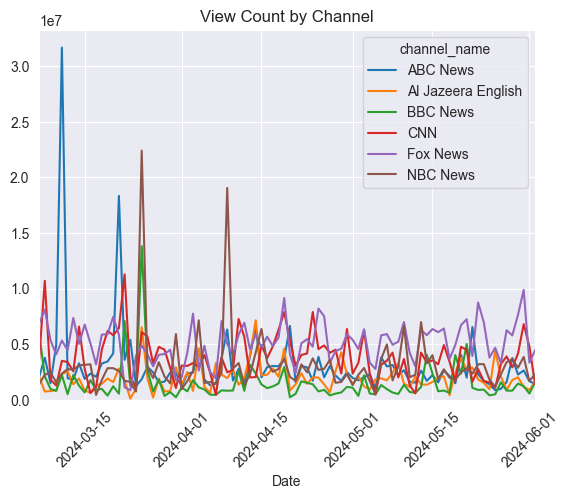

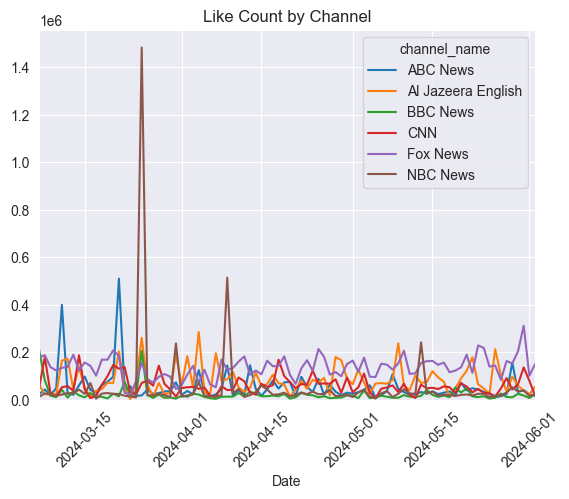

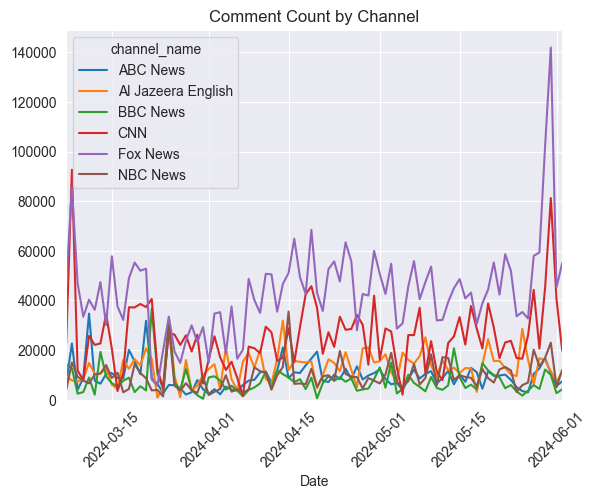

In [89]:
# Plot ViewCount and LikeCount for each channel by day
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['published_at']).dt.date
df['view_count'] = df['view_count'].fillna(0).astype(int)
df['like_count'] = df['like_count'].fillna(0).astype(int)
df['comment_count'] = df['comment_count'].fillna(0).astype(int)

df.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().plot()
plt.title('View Count by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

df.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().plot()
plt.title('Like Count by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

df.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().plot()
plt.title('Comment Count by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

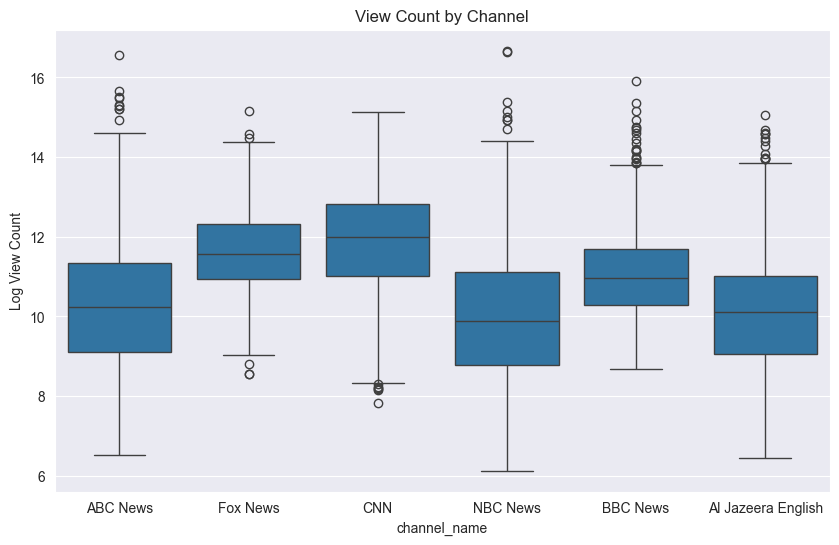

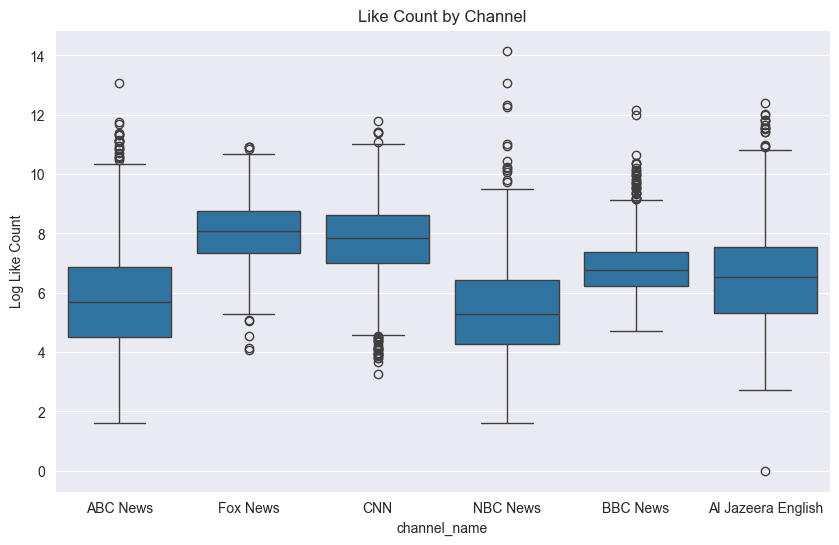

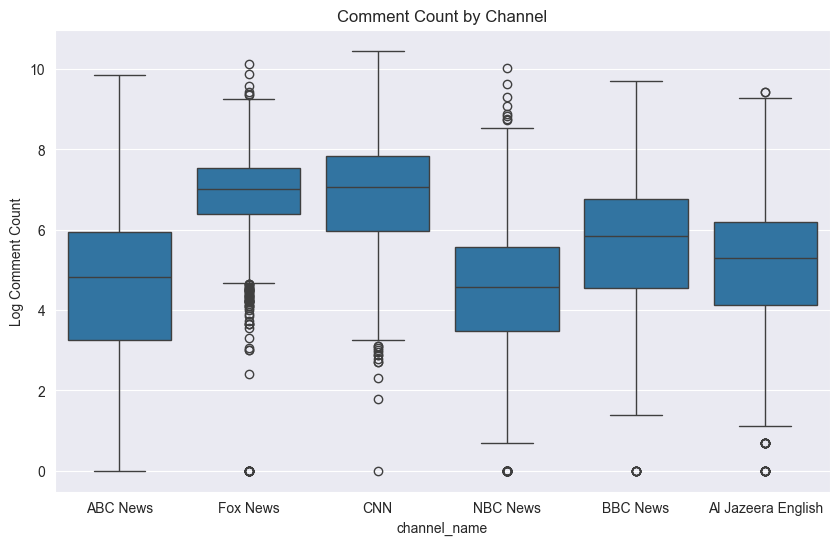

In [90]:
# box plot for view count, like count, and comment count
import seaborn as sns

# use log scale for better visualization
df['view_count_log'] = df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
df['like_count_log'] = df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
df['comment_count_log'] = df['comment_count'].apply(lambda x: 0 if x == 0 else np.log(x))

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='view_count_log', data=df)
plt.title('View Count by Channel')
plt.ylabel('Log View Count')    
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='like_count_log', data=df)
plt.title('Like Count by Channel')
plt.ylabel('Log Like Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='comment_count_log', data=df)
plt.title('Comment Count by Channel')
plt.ylabel('Log Comment Count')
plt.show()

In [91]:
political_words = ['trump', 'biden', 'democrat', 'republican']
political_df = df[df['video_title'].str.contains('|'.join(political_words), case=False)]

<Figure size 1000x600 with 0 Axes>

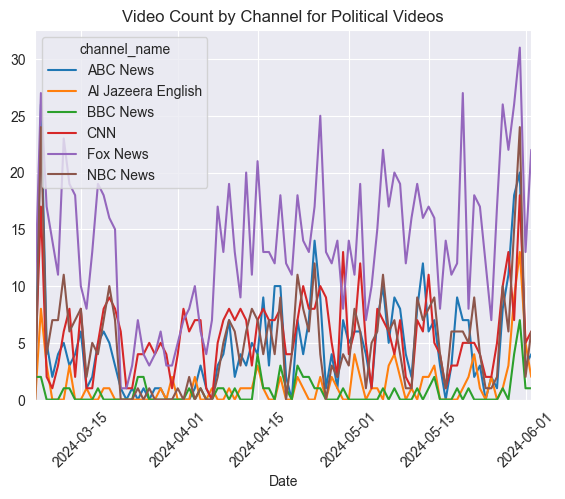

<Figure size 1000x600 with 0 Axes>

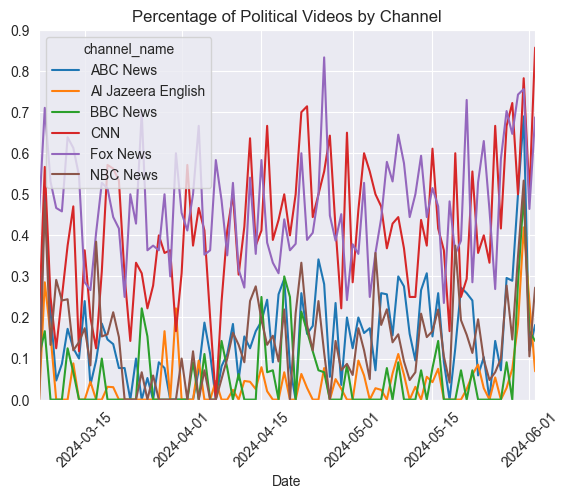

<Figure size 1000x600 with 0 Axes>

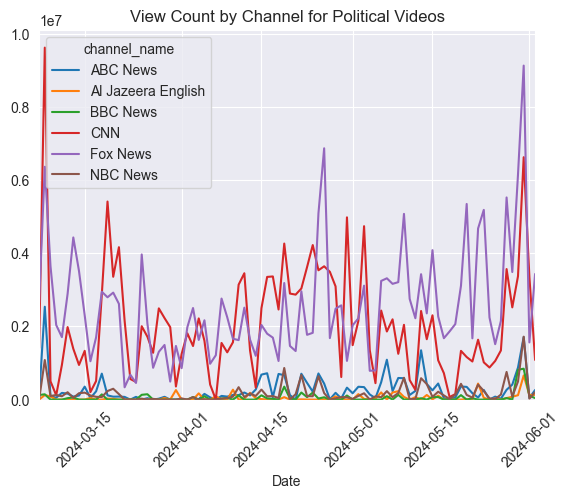

<Figure size 1000x600 with 0 Axes>

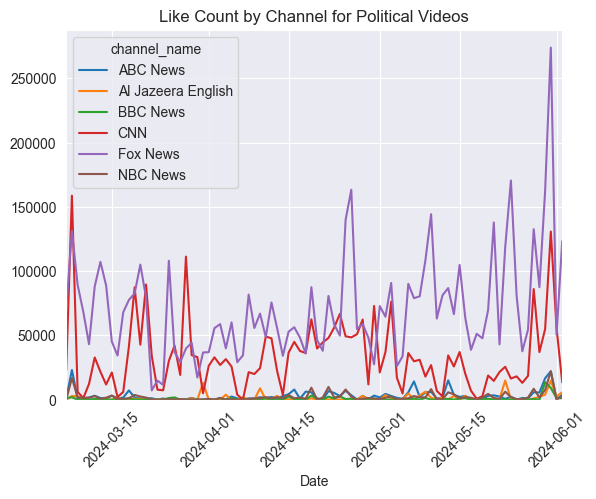

<Figure size 1000x600 with 0 Axes>

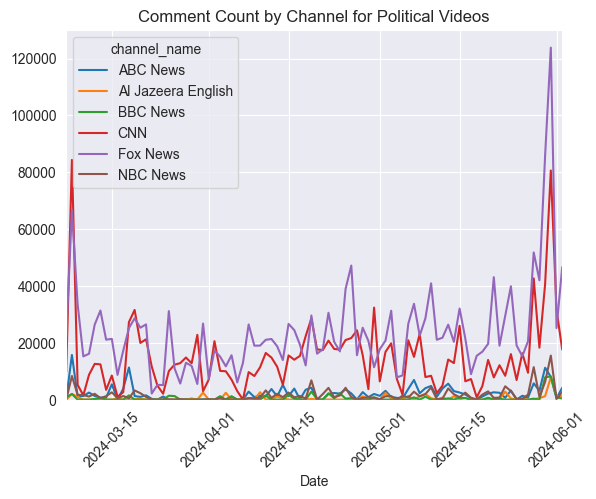

In [92]:
# video raw count
plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0).plot()
plt.title('Video Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

# percentage of political videos to the total videos
plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0).div(df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0)).plot()
plt.title('Percentage of Political Videos by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0).plot()
plt.title('View Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0).plot()
plt.title('Like Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0).plot()
plt.title('Comment Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_15312/2306398103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['view_count_log'] = political_df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_15312/2306398103.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['like_count_log'] = political_df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T

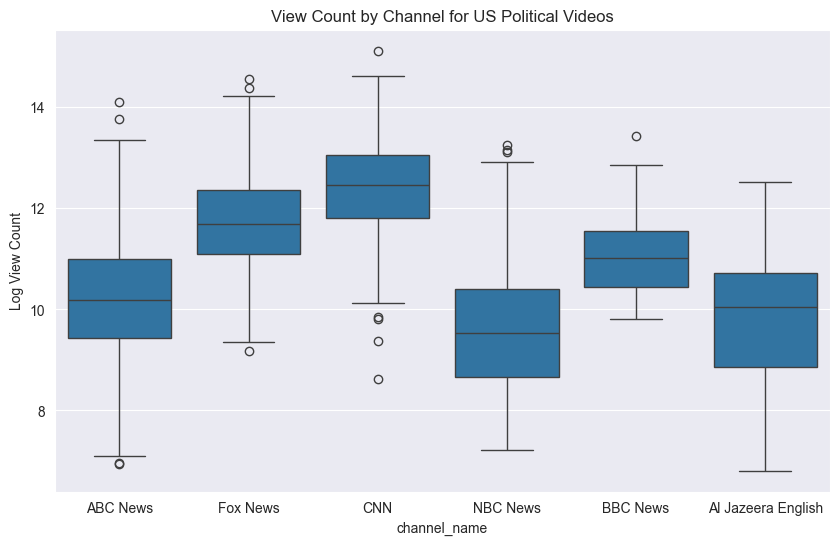

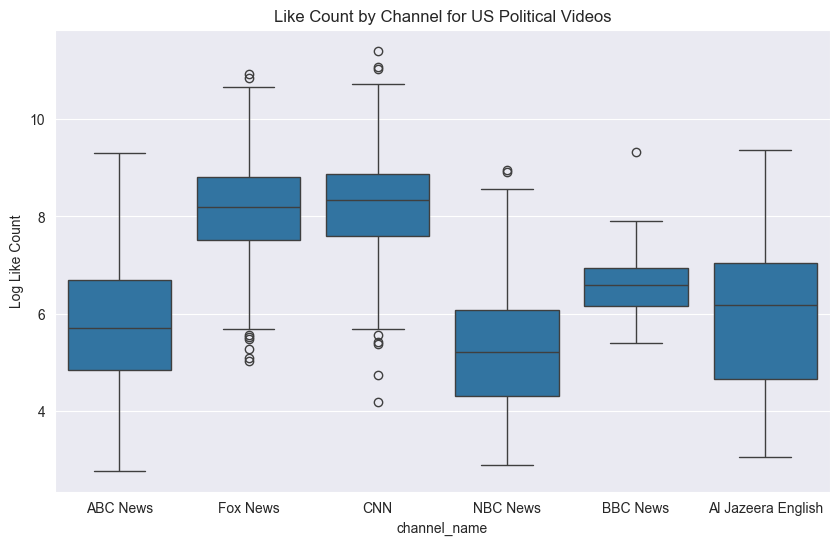

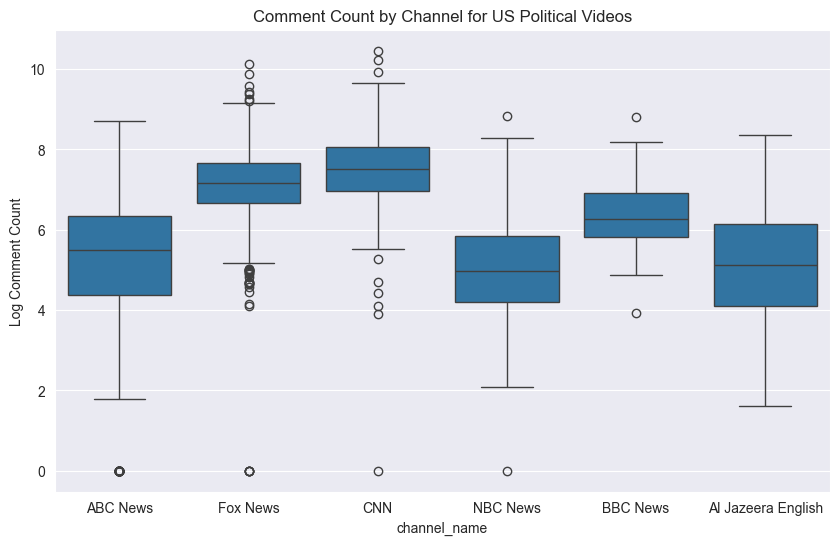

In [93]:
# box plot for view count, like count, and comment count
import seaborn as sns
import numpy as np

# use log scale for better visualization
political_df['view_count_log'] = political_df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
political_df['like_count_log'] = political_df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
political_df['comment_count_log'] = political_df['comment_count'].apply(lambda x: 0 if x == 0 else np.log(x))

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='view_count_log', data=political_df)
plt.title('View Count by Channel for US Political Videos')
plt.ylabel('Log View Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='like_count_log', data=political_df)
plt.title('Like Count by Channel for US Political Videos')
plt.ylabel('Log Like Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='comment_count_log', data=political_df)
plt.title('Comment Count by Channel for US Political Videos')
plt.ylabel('Log Comment Count')
plt.show()

In [94]:
import matplotlib.pyplot as plt

# CNN and Fox News
cnn_fox = df[df['channel_name'].isin(['CNN', 'Fox News'])]
cnn_fox

,channel_name,video_title,published_at,video_id,view_count,like_count,comment_count,Date,view_count_log,like_count_log,comment_count_log
25,Fox News,‘The Five’: Kamala receives ‘brutal’ feedback ...,2024-04-23T23:30:09Z,ftU67hCYlvc,601874,10857,2533,2024-04-23,13.307803,9.292565,7.837160
26,Fox News,Tyrus: We have a terrorist group marching in N...,2024-04-23T22:45:00Z,KisbbLuB-WQ,409073,18953,5424,2024-04-23,12.921649,9.849718,8.598589
27,Fox News,‘The Five’: Trump clashes with prosecutors ove...,2024-04-23T22:00:14Z,QHh9B2VXO60,232233,6089,2479,2024-04-23,12.355496,8.714239,7.815611
28,Fox News,Biden ripped over cannibal claim: &#39;A plagi...,2024-04-23T21:15:00Z,a82pVg2ndP4,81678,2633,1259,2024-04-23,11.310540,7.875879,7.138073
29,Fox News,Trump: The gag order is &#39;totally unconstit...,2024-04-23T20:26:41Z,Rl14by2FRGw,57359,1395,1878,2024-04-23,10.957085,7.240650,7.537963
...,...,...,...,...,...,...,...,...,...,...,...
12128,CNN,How Trump feels about potentially going to jail,2024-06-02T21:35:45Z,UxKI-pSKGes,137134,2361,2244,2024-06-02,11.828714,7.766841,7.716015
12129,CNN,"See Trump’s first post to TikTok, the app he o...",2024-06-02T19:43:32Z,_1oSGRBdUzQ,89381,1541,815,2024-06-02,11.400663,7.340187,6.703188
12130,CNN,Hear former Speaker McCarthy react to Trump’s ...,2024-06-02T17:18:04Z,jY4o9osphqg,426040,4444,4846,2024-06-02,12.962289,8.399310,8.485909
12131,CNN,Lara Trump slams GOP candidate for urging Amer...,2024-06-02T16:14:13Z,fBwEEyW8RlQ,173921,2834,5061,2024-06-02,12.066356,7.949444,8.529319


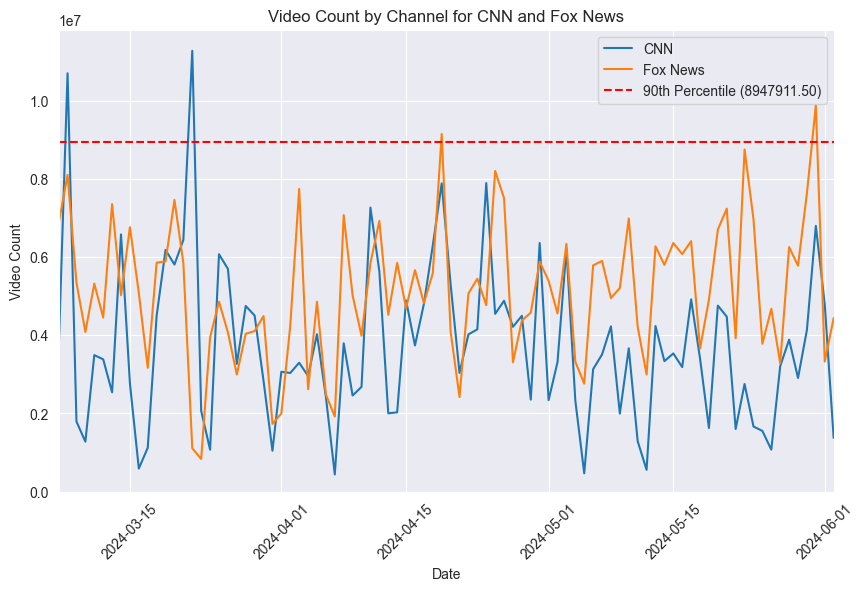

Dates exceeding the 98th percentile for CNN
channel_name       CNN  Fox News
Date                            
2024-03-08    10698621   8101411
2024-03-22    11273073   1109405
Dates exceeding the 98th percentile for Fox News
channel_name      CNN  Fox News
Date                           
2024-04-19    7882876   9144889
2024-05-31    6795715   9880460


<Figure size 1000x600 with 0 Axes>

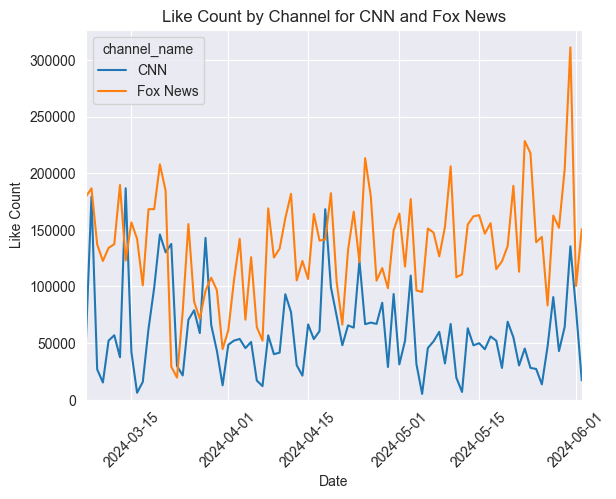

<Figure size 1000x600 with 0 Axes>

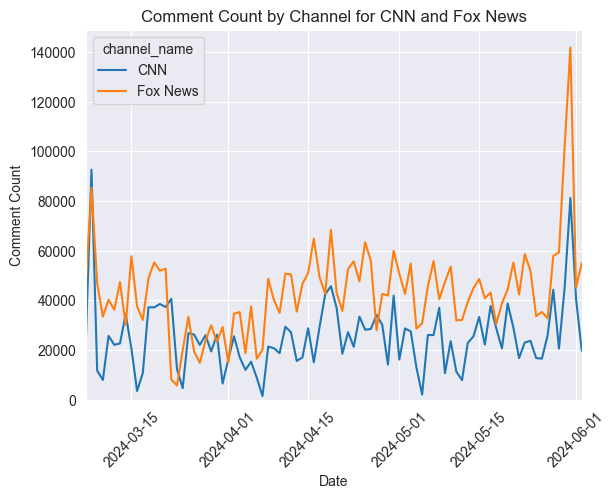

In [106]:
# Plot filled line chart with an upper quantile line
data = cnn_fox.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0)
# Calculate the 90th percentile for the view counts across all data.
quantile = data.values.flatten()
quantile = quantile[quantile > 0]  # Remove zeros if necessary
percentile = np.percentile(quantile, 98)
# Plot the data.
plt.figure(figsize=(10, 6))
data.plot(ax=plt.gca())
plt.title('Video Count by Channel for CNN and Fox News')
plt.xticks(rotation=45)
plt.ylabel('Video Count')
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
# Add the 90th percentile line.
plt.axhline(y=percentile, color='r', linestyle='--', label=f'90th Percentile ({percentile:.2f})')
plt.legend()
# Show the plot.
plt.show()
# print the dates exceeding the percentile line
print("Dates exceeding the 98th percentile for CNN")
print(data[data['CNN'] > percentile])
print("Dates exceeding the 98th percentile for Fox News")
print(data[data['Fox News'] > percentile])

plt.figure(figsize=(10, 6))
cnn_fox.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0).plot()
plt.title('Like Count by Channel for CNN and Fox News')
plt.xticks(rotation=45)
plt.ylabel('Like Count')
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

# Plot filled line chart
plt.figure(figsize=(10, 6))
cnn_fox.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0).plot()
plt.title('Comment Count by Channel for CNN and Fox News')
plt.xticks(rotation=45)
plt.ylabel('Comment Count')
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

In [96]:
# find the outliers
cnn_fox['view_count'].describe()
# find those from 75% to 100%
cnn_fox[cnn_fox['view_count'] > cnn_fox['view_count'].quantile(0.99)]

,channel_name,video_title,published_at,video_id,view_count,like_count,comment_count,Date,view_count_log,like_count_log,comment_count_log
379,CNN,Reporter describes moment judge told Trump to ...,2024-04-20T00:30:48Z,S2v9JeYwfjk,1862289,26191,8611,2024-04-20,14.437317,10.173171,9.060796
468,CNN,Hear Michael Douglas&#39; response when asked ...,2024-04-21T18:00:31Z,k2MN2eq4UjE,2209627,35893,9395,2024-04-21,14.608334,10.488298,9.147933
598,Fox News,Israel begins retaliatory strikes on Iran: Report,2024-04-19T02:13:51Z,xKVy4NgZF-w,1937049,23220,7335,2024-04-19,14.476676,10.052769,8.900413
614,CNN,"Israel has attacked Iran, US official tells CNN",2024-04-19T03:23:01Z,F22D0jCGdLU,1478757,13230,7982,2024-04-19,14.206712,9.490242,8.984944
769,Fox News,Jesse Watters: Biden ran away from the podium,2024-04-25T02:15:01Z,vyCNJmAUqjw,1348565,30119,9314,2024-04-25,14.114552,10.312911,9.139274
971,CNN,Watch US Marine’s GoPro footage that challenge...,2024-04-24T11:55:16Z,SkM-Eyw4o-w,2694253,40103,7261,2024-04-24,14.806632,10.599206,8.890273
1165,CNN,Professor who correctly predicted 9 presidenti...,2024-04-30T11:00:20Z,PB8JazHcQ_k,1872430,20273,8042,2024-04-30,14.442748,9.917045,8.992433
1365,CNN,Boston Dynamic retires their famous robot,2024-04-18T01:35:15Z,u9CFE5dR8mU,1618978,86727,2395,2024-04-18,14.297306,11.370521,7.781139
1883,CNN,How Melania reacted when she learned about Tru...,2024-04-17T01:19:21Z,CZuUFWiFwsc,1717818,15446,5432,2024-04-17,14.356565,9.645105,8.600063
2455,CNN,"Watch Colin Jost roast Biden, Trump and others...",2024-04-28T03:44:54Z,OzhqFrtcTU4,2129016,38764,5587,2024-04-28,14.571170,10.565247,8.628198


In [97]:
# Initialize appearance column with default value
cnn_fox['appearance'] = -1

# Iterate over each row and update appearance column based on video title
for index, row in cnn_fox.iterrows():
    title_lower = row['video_title'].lower()
    if 'trump' in title_lower and 'biden' not in title_lower:
        cnn_fox.at[index, 'appearance'] = 0
    elif 'biden' in title_lower and 'trump' not in title_lower:
        cnn_fox.at[index, 'appearance'] = 1
    elif 'biden' in title_lower and 'trump' in title_lower:
        cnn_fox.at[index, 'appearance'] = 2

/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_15312/3238663859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnn_fox['appearance'] = -1


In [98]:
cnn_fox_political = cnn_fox[cnn_fox['appearance'] != -1]
cnn_fox_political.describe()
var = cnn_fox_political[cnn_fox_political['view_count'] > cnn_fox_political['view_count'].quantile(0.98)]

In [99]:
# fnd the 5 dates with the most views and show the videos on those dates
top_dates = cnn_fox_political.groupby('Date')['view_count'].sum().nlargest(5).index
print(top_dates)
cnn_fox_political[cnn_fox_political['Date'].isin(top_dates)][['Date', 'video_title', 'view_count', 'like_count', 'comment_count', 'channel_name', 'appearance']]

Index([2024-03-08, 2024-05-31, 2024-04-26, 2024-05-30, 2024-05-28], dtype='object', name='Date')


,Date,video_title,view_count,like_count,comment_count,channel_name,appearance
1494,2024-04-26,Judge Jeanine: Biden has &#39;lost it&#39;,442091,12912,3208,Fox News,1
1496,2024-04-26,"Trump to Biden: I&#39;m &#39;ready, willing an...",250930,4327,3618,Fox News,2
1497,2024-04-26,Trump lawyer: This is a serious problem,559383,11253,3128,Fox News,0
1498,2024-04-26,Laura Ingraham: NY v Trump prosecutors are &#3...,104172,3151,847,Fox News,0
1499,2024-04-26,Left-wing outlet calls out Biden for ignoring ...,58816,1996,767,Fox News,1
...,...,...,...,...,...,...,...
11866,2024-05-31,Hear what Don Jr. said after Trump guilty verdict,220239,3274,3114,CNN,0
11867,2024-05-31,&#39;Cannot have a double standard&#39;: Retir...,198641,3497,2615,CNN,0
11869,2024-05-31,Former President Donald Trump’s lead attorney ...,344381,6442,920,CNN,0
11871,2024-05-31,Kaitlan Collins asked Todd Blanche if he regre...,977483,13699,15503,CNN,0


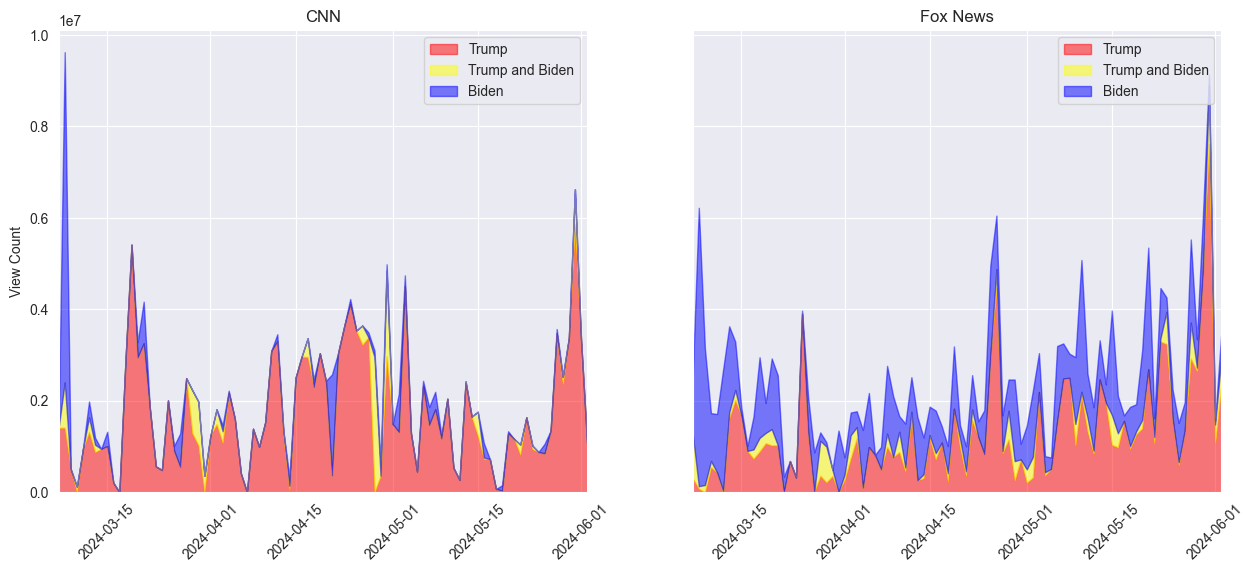

In [100]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('View Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

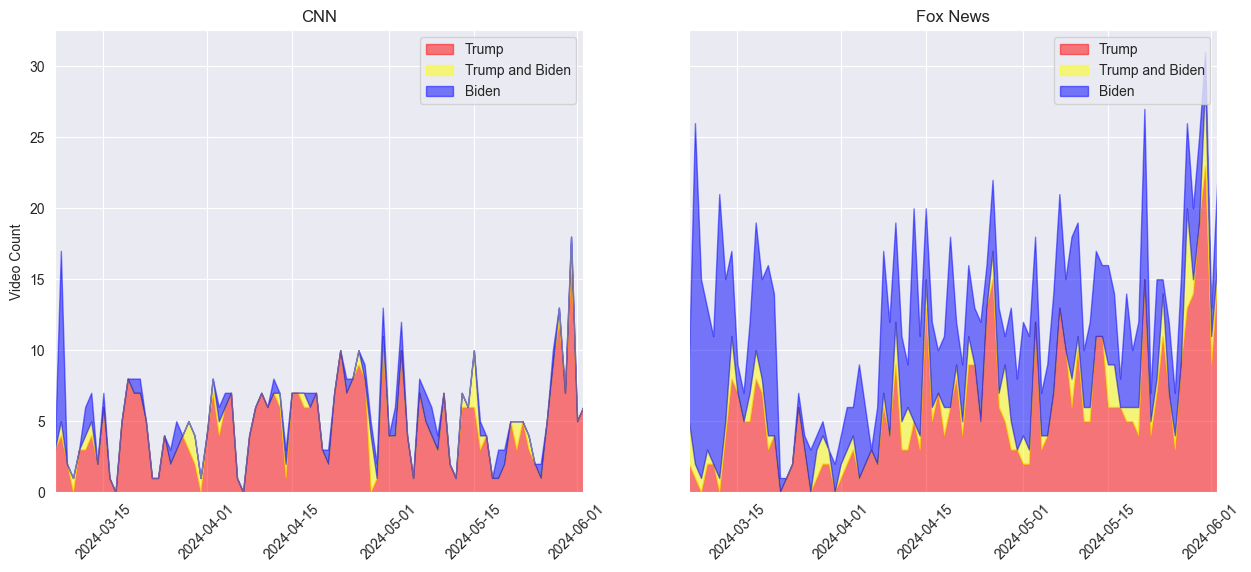

In [101]:
# raw video count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
    
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Video Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
    
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()


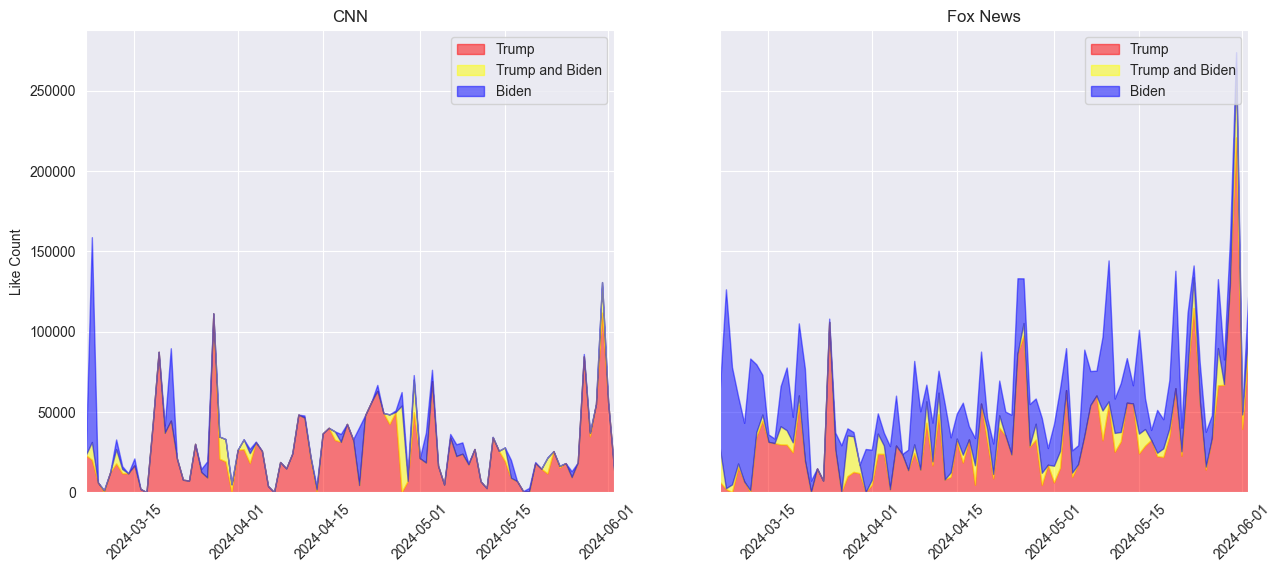

In [102]:
# like count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Like Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

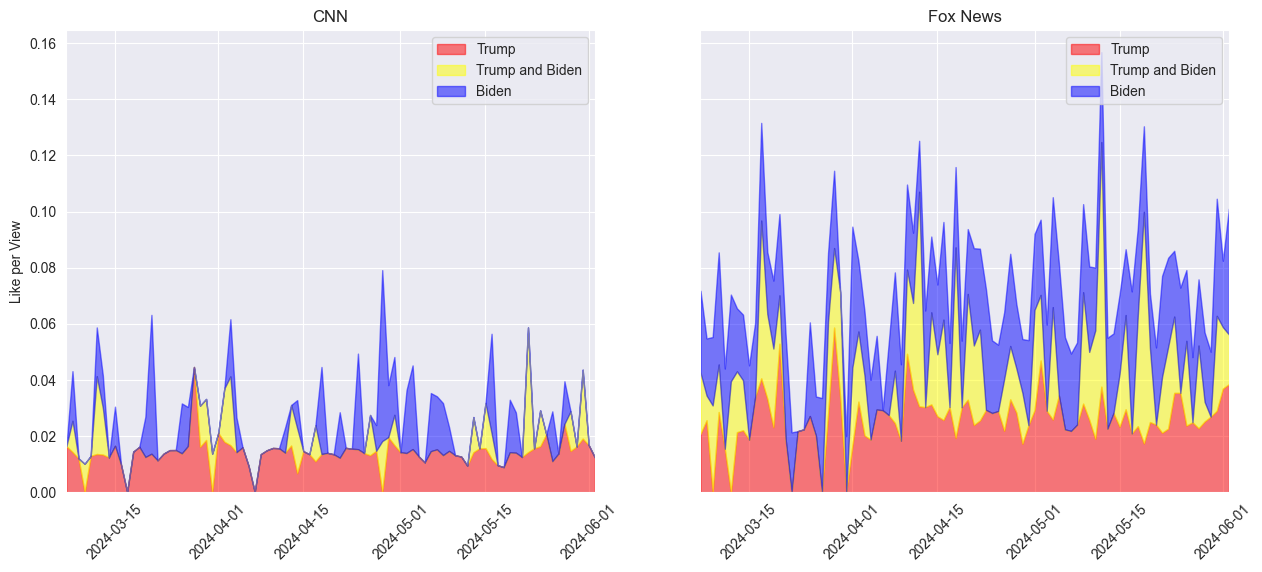

In [103]:
# like per view
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Like per View')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

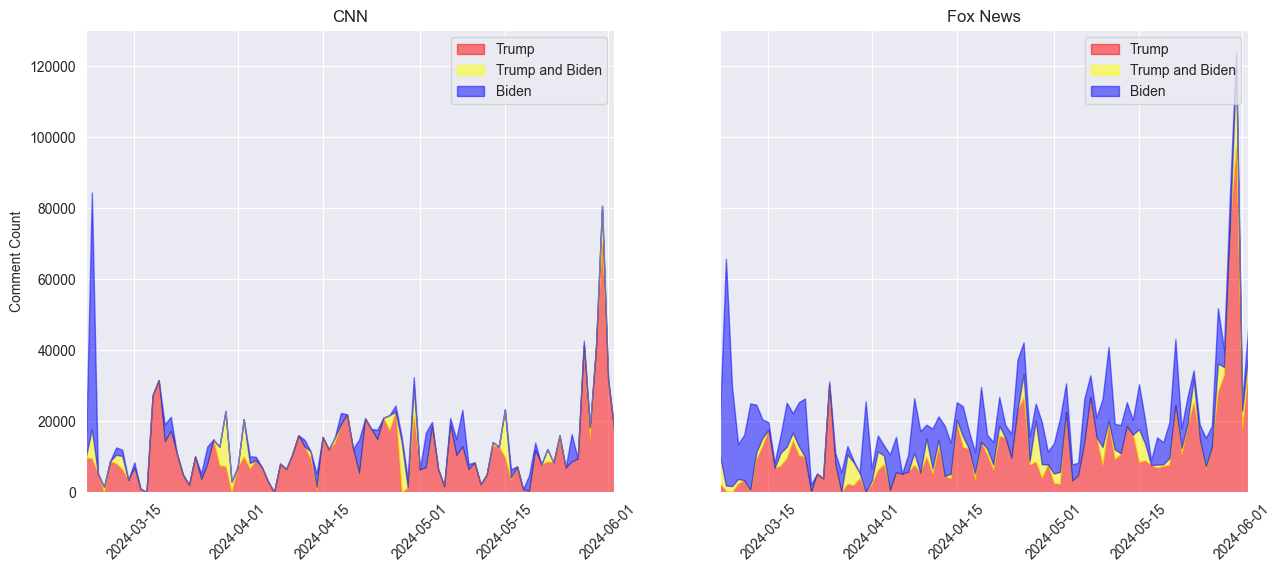

In [104]:
# comment count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Comment Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

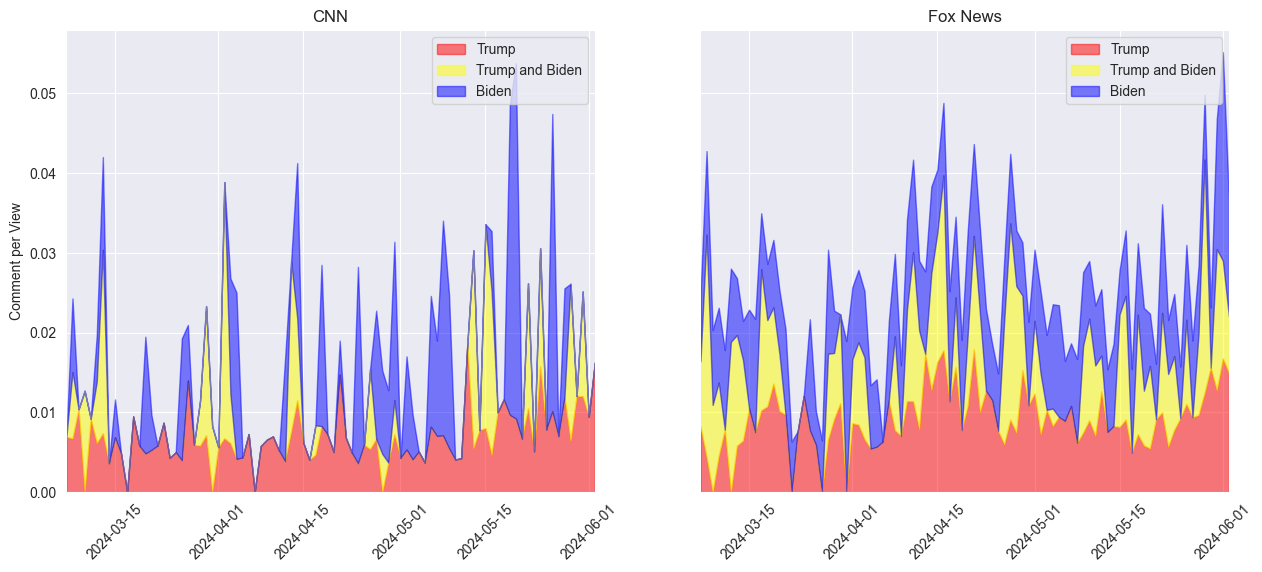

In [105]:
# comment per view
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)
    
ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)
    
ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Comment per View')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

In [118]:
# most commented videos
most_commented = cnn_fox.nlargest(10, 'comment_count')
most_commented[['video_title', 'view_count', 'like_count', 'comment_count', 'channel_name', 'appearance']]

,video_title,view_count,like_count,comment_count,channel_name,appearance
7088,See Biden&#39;s response to Marjorie Taylor Gr...,3674983,63967,34961,CNN,1
11318,Robert De Niro spars with bystander during rem...,1549792,61282,27508,CNN,0
8276,Biden decried for proclaiming Transgender Visi...,1181770,18427,24824,Fox News,1
11865,&#39;You&#39;re lying&#39;: George Conway clas...,2130394,45331,20696,CNN,0
11819,Speaker Johnson makes bold prediction after Tr...,2114823,55376,19476,Fox News,0
11871,Kaitlan Collins asked Todd Blanche if he regre...,977483,13699,15503,CNN,0
11626,Jonathan Turley: I believe Trump verdict will ...,929849,20323,14513,Fox News,0
5501,Crockett speaks out about fight in Congress wi...,1067742,26586,14182,CNN,-1
7901,Trump is unable to make $464 million bond,1272112,20843,14059,CNN,0
8326,Trump posts video that shows image of Biden ti...,769732,10986,13933,CNN,2


Statistic Analysis

# set feature as the video title and channel name, target as the engagement(comment rate)
# calculate the comment rate
df['comment_rate'] = df['comment_count'] / df['view_count']
df['comment_rate'].describe()

# find the outliers
df['comment_rate'].quantile(0.99)
df[df['comment_rate'] > df['comment_rate'].quantile(0.99)]

# vectorize the video title
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the vectorizer
X = vectorizer.fit_transform(df['video_title'])

# Convert the result to a DataFrame
title_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
title_df

# merge the title_df with the original dataframe
df = pd.concat([df, title_df], axis=1)
df

# split the data into training and testing
from sklearn.model_selection import train_test_split

# Define the features and target
features = title_df.columns
target = 'comment_rate'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# train the model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# predict the comment rate
y_pred = model.predict(X_test)
y_pred

# evaluate the model
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Accuracy
print(f"Mean Squared Error: {mse}")

# Calculate the coefficient of determination (r^2)
r2 = model.score(X_test, y_test)
print(f"R^2: {r2}")

# find the most important features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
importances = importances[indices]
features = features[indices]

# Print the feature ranking
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. feature {features[f]} ({importances[f]})")